## Q1.  the key features of the wine quality data set and the importance of each feature in predicting the quality of wine is given below
- volatile acidity :   Volatile acidity is the gaseous acids present in wine.
- fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- residual sugar :   Amount of sugar left after fermentation.
- citric acid :    It is weak organic acid, found in citrus fruits naturally.
- chlorides :   Amount of salt present in wine.
- free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
- total sulfur dioxide 
- pH :   In wine pH is used for checking acidity
- density 
- sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
- alcohol :   Percent of alcohol present in wine.

## Q2.  One way of handling missing values is the deletion of the rows or columns having null values. If any columns have more than half of the values as null then you can drop the entire column. In the same way, rows can also be dropped if having one or more columns values as null.
###  advantages: Imputation preserves all cases by replacing missing data with an estimated value based on other available information. Once all missing values have been imputed, the data set can then be analysed using standard techniques for complete data.
### Disadvantages: Requires a lot of data to be accurate. Can require the target (outcome) variable. Need to split data for imputation into train and test (this might be difficult depending on the amount and structure of your missing data)

## Q3.  It was found that (i) the respondents viewed that at university level most of the psychological, physical, socio-economic and educational factors affected their performance in examination (ii) Change in pattern of question papers near examination affect student's performance (iii) The respondents viewed that unfair 
### Two main statistical methods are used in data analysis: descriptive statistics, which summarizes data using indexes such as mean and median and another is inferential statistics, which draw conclusions from data using statistical tests such as student's t-test.

## Q4.  Feature engineering is the process of selecting, transforming, extracting, combining, and manipulating raw data to generate the desired variables for analysis or predictive modeling. It is a crucial step in developing a machine learning model.
- Significance criteria. Hypothesis tests are the most popular criteria used for selecting variables in practical modeling problems.
- Information criteria.
- Penalized likelihood.
- Change‐in‐estimate criterion.
- Background knowledge.

## Q5.  code

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('wineQuality-red.csv')
df.head()
df.shape()
df.describe()

- square-root for moderate skew: sqrt(x) for positively skewed data, ...
- log for greater skew: log10(x) for positively skewed data, ...
- inverse for severe skew: 1/x for positively skewed data. ...
- Linearity and heteroscedasticity:

## Q6.   code

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
df = load_wine(as_frame=True)
df = df.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.drop('target', axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)

scaled_df =pd.DataFrame(features,columns=df.columns)

scaled_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [8]:
X=scaled_df.values

In [10]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [12]:
centers=pca.transform(kmeans.cluster_centers_)
centers

array([[-1.17666133,  1.3441594 ],
       [ 3.36298689, -1.84942094],
       [ 0.10091099,  0.78030786],
       [-2.96250024, -0.632872  ],
       [ 0.7284258 ,  1.9284551 ],
       [ 1.56013822,  0.42271735],
       [-0.94189919,  1.94514084],
       [-2.57695836, -1.99830841],
       [ 1.85533849, -0.94509111],
       [ 2.4448781 , -0.65881561]])

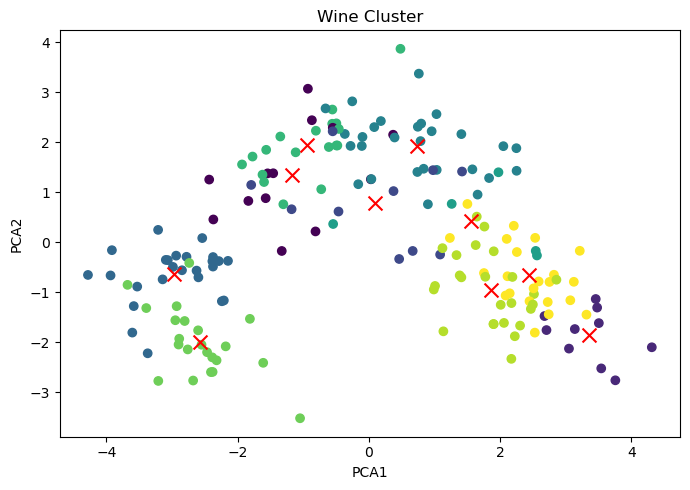

In [13]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [14]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

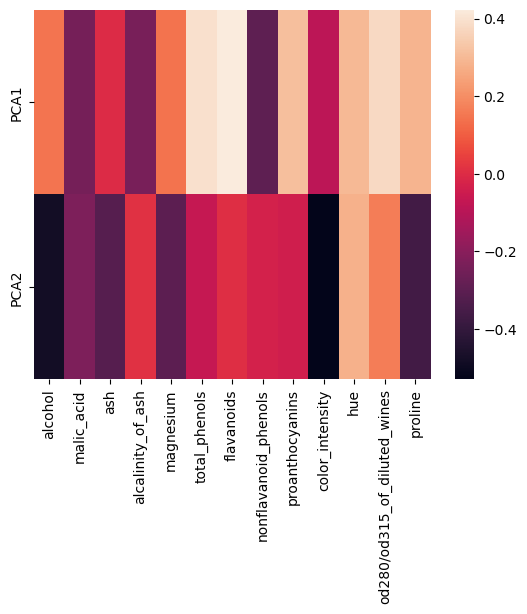

In [15]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df.columns)
# Heat map
sns.heatmap(component_df)
plt.show()

## The plot representing the variance explained by the components is called Scree Plot. The first 2 components explain approximately 80% of the total variation and 3 components, almost 90%.